### Chapter -2: Exploratory Data Analysis (EDA): 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt

In [2]:
# read the data set
df = pd.read_csv('../data/nyc_data/updated_dataset.csv', compression='gzip')
df.head()

,recorded_at,direction,line_name,org_name,org_lat,org_long,dest_name,dest_lat,dest_long,vech_name,...,arrivial_app,dist_from_stop,expected_arr_time,schedule_arr_time,weekend_status,day_of_year,month_number,day_of_month,time_of_day,delays
0,2017-06-05 07:20:34,0.0,B46-SBS,UTICA AV/AV N,40.619896,-73.926826,SELECT BUS De KALB AV via UTICA,40.693672,-73.931168,NYCT_7330,...,approaching,102.0,2017-06-05 07:20:54,2017-06-05 07:19:03,False,156,6,5,439,1.85
1,2017-12-08 12:09:55,1.0,M101,LEXINGTON AV/E 100 ST,40.787506,-73.949830,LTD EAST VILLAGE 6 ST via LEX AV,40.729113,-73.990259,NYCT_6057,...,< 1 stop away,395.0,2017-12-08 12:12:01,2017-12-08 12:01:59,False,342,12,8,721,10.03
2,2017-10-25 05:41:15,0.0,Bx31,TREMONT AV/LANE AV,40.840864,-73.842457,WOODLAWN KATONAH AV,40.902777,-73.868318,NYCT_7703,...,approaching,67.0,2017-10-25 05:41:31,2017-10-25 05:41:25,False,298,10,25,341,0.10
3,2017-10-05 13:45:21,1.0,Q20A,COLLEGE PT BL/15 AV,40.784074,-73.845893,JAMAICA MERRICK BL via 20 AV via MAIN S,40.704933,-73.793318,NYCT_7391,...,approaching,97.0,2017-10-05 13:45:57,2017-10-05 13:45:48,False,278,10,5,825,0.15
4,2017-12-13 07:18:53,0.0,Bx34,VALENTINE AV/E FORDHAM RD,40.862431,-73.895859,WOODLAWN KATONAH AV,40.902777,-73.868318,NYCT_4102,...,approaching,58.0,2017-12-13 07:19:14,2017-12-13 07:19:00,False,347,12,13,439,0.23


In [3]:
# size of the dataset
df.shape

(1000000, 23)

<b>Note:</b> There are 1M datapoints and 23 variables

In [4]:
# Null value counts
all_columns = list(df.columns)

for element in all_columns:
    print(f'In row {element}, total number of Null values: {df[element].isna().sum()}')

In row recorded_at, total number of Null values: 0
In row direction, total number of Null values: 0
In row line_name, total number of Null values: 0
In row org_name, total number of Null values: 0
In row org_lat, total number of Null values: 0
In row org_long, total number of Null values: 0
In row dest_name, total number of Null values: 0
In row dest_lat, total number of Null values: 0
In row dest_long, total number of Null values: 0
In row vech_name, total number of Null values: 0
In row vech_lat, total number of Null values: 0
In row vech_long, total number of Null values: 0
In row next_point_name, total number of Null values: 0
In row arrivial_app, total number of Null values: 0
In row dist_from_stop, total number of Null values: 0
In row expected_arr_time, total number of Null values: 0
In row schedule_arr_time, total number of Null values: 0
In row weekend_status, total number of Null values: 0
In row day_of_year, total number of Null values: 0
In row month_number, total number of

<b>Note:</b> No Null values found

### Univariate Analysis: 
Here, I try to demonstrate the univariate statistics of each column

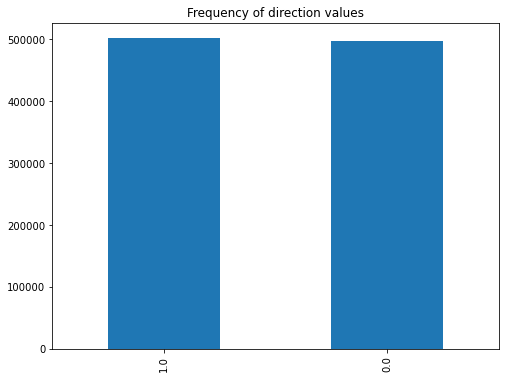

In [5]:
# Direction: is 0|1:= Outbound & Inbound directions for the bus route
df['direction'].value_counts().plot(kind='bar',  title = 'Frequency of direction values', figsize=(8,6))

plt.savefig('../Documentation/Figure/fig_01.png',  bbox_inches='tight')
plt.show()

In [6]:
# Total Unique line name
print(f'Total Number of Unique Line: {len(df.line_name.unique())}')

Total Number of Unique Line: 242


In [7]:
# Getting Top 10 frequent line name
df1 = df['line_name'].value_counts().iloc[:10].rename_axis('Line Name').reset_index(name='Counts')
df1

,Line Name,Counts
0,B6,17915
1,B41,15836
2,Q58,14247
3,Q44-SBS,13679
4,B35,13271
5,Bx36,13260
6,M15-SBS,12282
7,M101,12031
8,B82,11960
9,Q27,11877


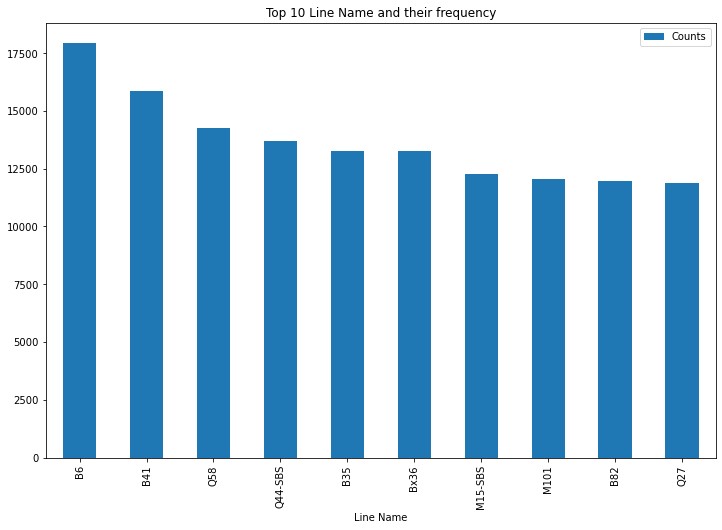

In [8]:
# Plot: Top 10 frequent line name
df1.plot(x = 'Line Name', y = 'Counts', kind='bar', title = 'Top 10 Line Name and their frequency', figsize=(12,8))
plt.savefig('../Documentation/Figure/fig_02.png',  bbox_inches='tight')
plt.show()

In [9]:
# Total number of unique source stop
print(f'Total Number of Unique Source Stop: {len(df.org_name.unique())}')

Total Number of Unique Source Stop: 628


In [10]:
# Top 10 Source Stop
df2 = df['org_name'].value_counts().iloc[:10].rename_axis('Source Name').reset_index(name='Counts')
df2

,Source Name,Counts
0,E 126 ST/2 AV,15808
1,MERRICK BL/ARCHER AV,14427
2,W 179 ST/BROADWAY,13639
3,138 ST/37 AV,10101
4,HARWAY AV/BAY 37 ST,9614
5,4 AV/E 10 ST,9328
6,ASTOR PL/3 AV,8704
7,TEARDROP/LAYOVER,8494
8,STILLWELL TERMINAL BUS LOOP,8081
9,ELTINGVILLE/TRANSIT CENTER,8071


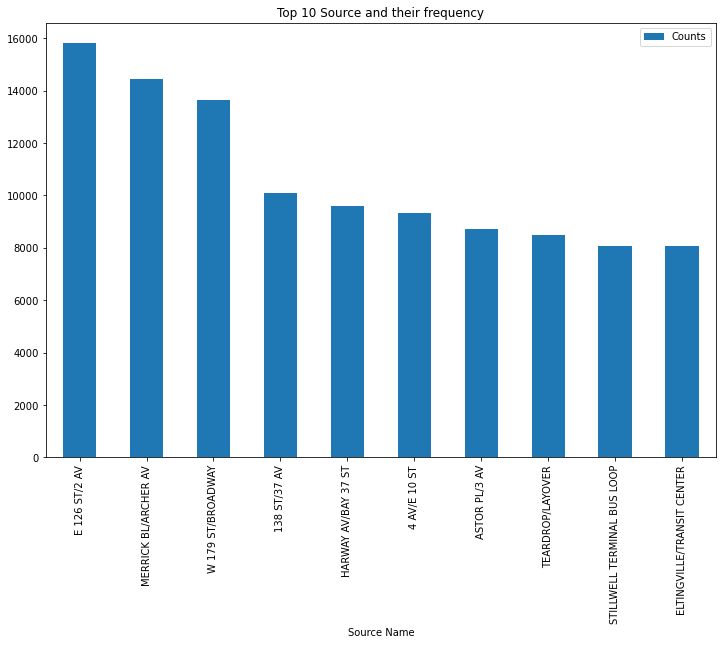

In [11]:
# Plot: top 10 Source Stop
df2.plot(x = 'Source Name', y = 'Counts', kind='bar', title = 'Top 10 Source and their frequency', figsize=(12,8))
plt.savefig('../Documentation/Figure/fig_03.png',  bbox_inches='tight')
plt.show()

In [12]:
# Total number of unique destination stop
print(f'Total Number of Unique Destination Stop: {len(df.dest_name.unique())}')

Total Number of Unique Destination Stop: 651


In [13]:
# Getting top 10 Destination Stop
df3 = df['dest_name'].value_counts().iloc[:10].rename_axis('Destination Name').reset_index(name='Counts')
df3

,Destination Name,Counts
0,WASHINGTON HTS GW BRIDGE,13936
1,ST GEORGE FERRY,8480
2,FLUSHING MAIN ST STA,7903
3,W FARMS RD SOUTHERN BL,7891
4,SELECT BUS JAMAICA via MAIN ST,6846
5,SELECT BUS SERVICE SOUTH FERRY via 2 AV,6689
6,SELECT BUS BRONX ZOO via MAIN ST,6673
7,FLUSHING MAIN ST STA,6453
8,BED-STUY WOODHULL HOSP,6169
9,WESTCHESTER SQ,5942


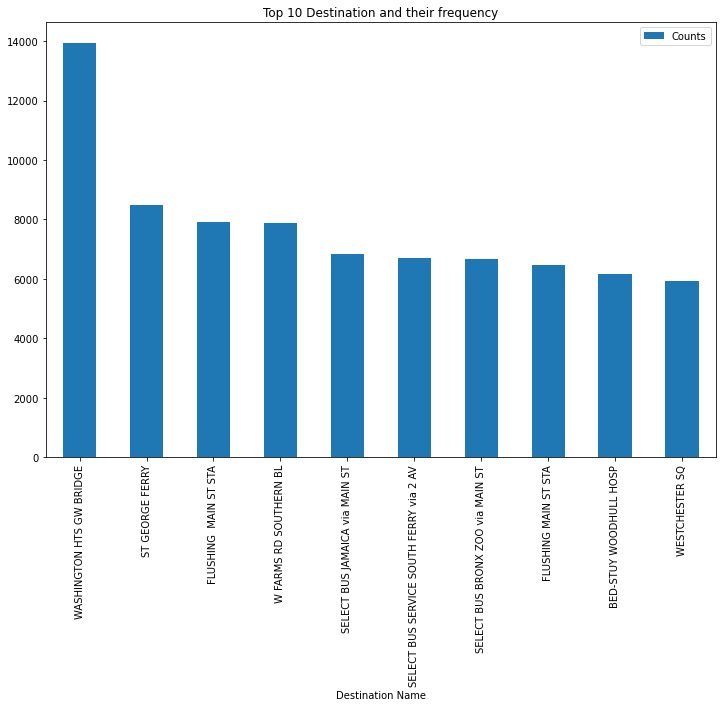

In [14]:
# Plot: top 10 Destination Stop
df3.plot(x = 'Destination Name', y = 'Counts', kind='bar', title = 'Top 10 Destination and their frequency', 
         figsize=(12,8))

plt.savefig('../Documentation/Figure/fig_04.png',  bbox_inches='tight')
plt.show()

In [15]:
# Getting all bus name
print(f'Total Number of Unique Bus Name: {len(df.vech_name.unique())}')

Total Number of Unique Bus Name: 4629


In [16]:
# Getting top 10 bus name
df4 = df['vech_name'].value_counts().iloc[:10].rename_axis('Vehicle Name').reset_index(name='Counts')
df4

,Vehicle Name,Counts
0,NYCT_6049,452
1,NYCT_5937,449
2,NYCT_6037,435
3,NYCT_5858,424
4,NYCT_4240,423
5,NYCT_6033,421
6,NYCT_5857,420
7,NYCT_6051,417
8,NYCT_4582,413
9,NYCT_4233,413


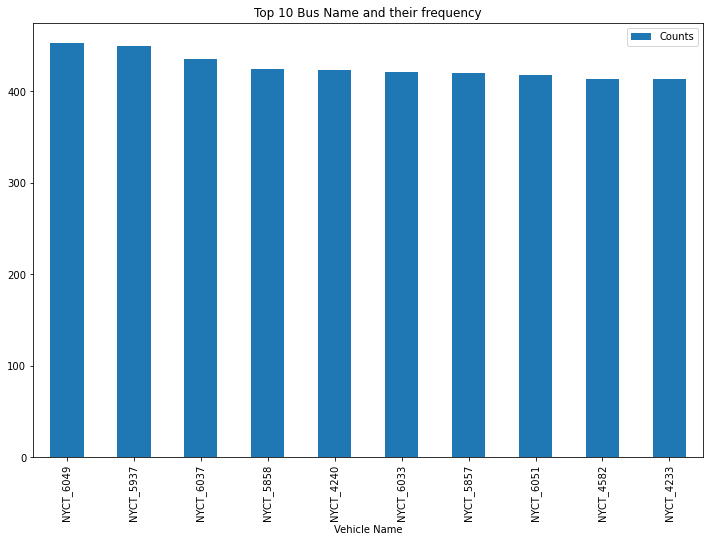

In [17]:
# Plot: top 10 bus name
df4.plot(x = 'Vehicle Name', y = 'Counts', kind='bar', title = 'Top 10 Bus Name and their frequency', figsize=(12,8))

plt.savefig('../Documentation/Figure/fig_05.png',  bbox_inches='tight')
plt.show()

In [18]:
# Total number of unique arrival approximation
print(f'Total Number of Unique Arrival Approximation: {len(df.arrivial_app.unique())}')

Total Number of Unique Arrival Approximation: 208


In [19]:
# Getting top 10 arrival approximation results
df5 = df['arrivial_app'].value_counts().iloc[:10].rename_axis('Arrival Approximation').reset_index(name='Counts')
df5

,Arrival Approximation,Counts
0,approaching,382261
1,< 1 stop away,341566
2,at stop,242694
3,0.6 miles away,6034
4,0.5 miles away,4493
5,0.7 miles away,3805
6,0.8 miles away,2127
7,0.9 miles away,1723
8,1.0 miles away,1489
9,1.1 miles away,978


In [20]:
# Calculate the Percentage of each type
percentage = np.round(np.asarray(df5.Counts) / len(df), 3) * 100
df5['Percentage'] = ['%.1f' % d + '%'  for d in percentage]

df5

,Arrival Approximation,Counts,Percentage
0,approaching,382261,38.2%
1,< 1 stop away,341566,34.2%
2,at stop,242694,24.3%
3,0.6 miles away,6034,0.6%
4,0.5 miles away,4493,0.4%
5,0.7 miles away,3805,0.4%
6,0.8 miles away,2127,0.2%
7,0.9 miles away,1723,0.2%
8,1.0 miles away,1489,0.1%
9,1.1 miles away,978,0.1%


In [21]:
# pick top three rows
df6 = df5[:3]

# set the last rows for Others data
df6.loc[len(df6)] = ['Others', (len(df) - sum(df6.Counts)), 
                     '%.1f' % (round((1 - (sum(df6.Counts) / len(df))), 3) * 100) + '%']

df6

,Arrival Approximation,Counts,Percentage
0,approaching,382261,38.2%
1,< 1 stop away,341566,34.2%
2,at stop,242694,24.3%
3,Others,33479,3.3%


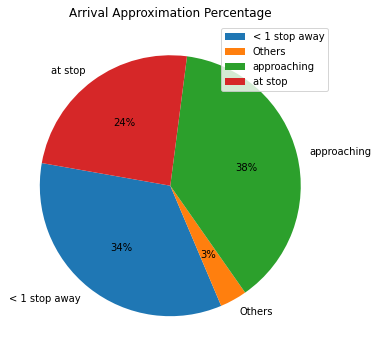

In [22]:
df6.groupby(['Arrival Approximation']).sum().plot(kind='pie', y='Counts', autopct='%1.0f%%', 
                                                  title = 'Arrival Approximation Percentage',
                                                  startangle=170, figsize=(6,6))

plt.axis('off')
plt.savefig('../Documentation/Figure/fig_06.png',  bbox_inches='tight')
plt.show()

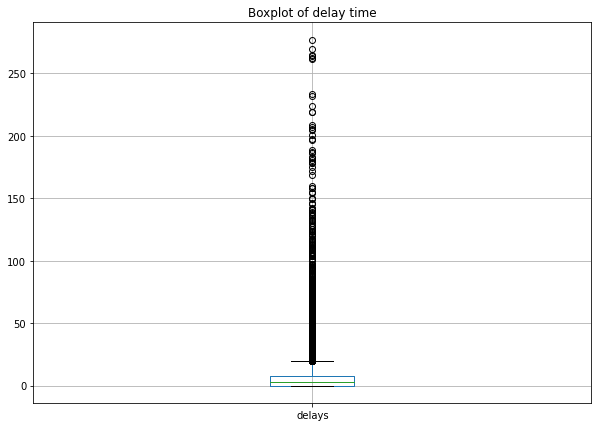

In [23]:
df.boxplot('delays', figsize=(10,7))
plt.title('Boxplot of delay time')
plt.savefig('../Documentation/Figure/fig_07.png',  bbox_inches='tight')
plt.show()

In [24]:
# Make interval for different delay amounts
t0     = len(df[(df['delays'] == 0)])
t0_5   = len(df[(df['delays'] > 0)  & (df['delays'] <= 5)])
t5_10  = len(df[(df['delays'] > 5)  & (df['delays'] <= 10)])
t10_20 = len(df[(df['delays'] > 10) & (df['delays'] <= 20)])
t20_50 = len(df[(df['delays'] > 20) & (df['delays'] <=50 )])
t50    = len(df[df['delays'] > 50])

interval = ['=0', '>0 and <=5', '>5 and <=10', '>10 and <=20', '>20 and <=50', '>50']
counts = [t0, t0_5, t5_10, t10_20, t20_50, t50]
percentage = np.round((np.asarray(counts) / len(df)), 3) * 100

df7 = pd.DataFrame({'interval' : interval, 'counts' : counts, 'percentage' : percentage})
df7

,interval,counts,percentage
0,=0,264290,26.4
1,>0 and <=5,373000,37.3
2,>5 and <=10,172606,17.3
3,>10 and <=20,126007,12.6
4,>20 and <=50,57627,5.8
5,>50,6470,0.6


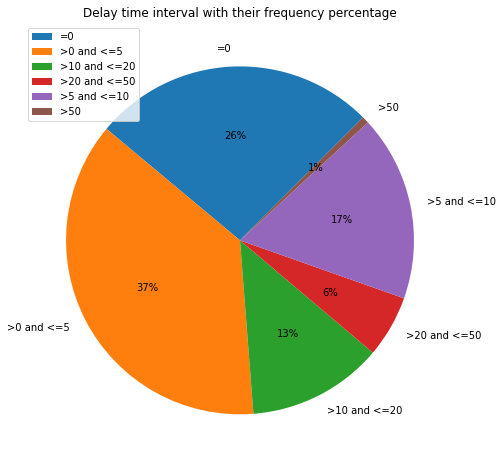

In [25]:
# Plot the interval data
df7.groupby(['interval']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', 
                                     title = 'Delay time interval with their frequency percentage',
                                     startangle=45, figsize=(8,8))

plt.axis('off')
plt.savefig('../Documentation/Figure/fig_08.png',  bbox_inches='tight')
plt.show()

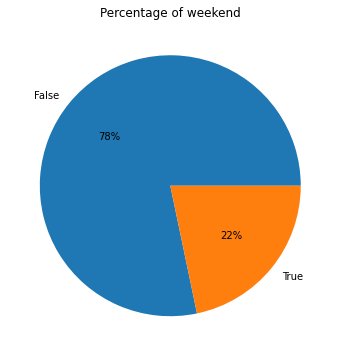

In [26]:
# Plot weekend status data
df['weekend_status'].value_counts().plot(kind='pie', autopct='%1.0f%%', 
                                         title='Percentage of weekend', figsize=(6,6))

plt.axis('off')
plt.savefig('../Documentation/Figure/fig_09.png',  bbox_inches='tight')
plt.show()

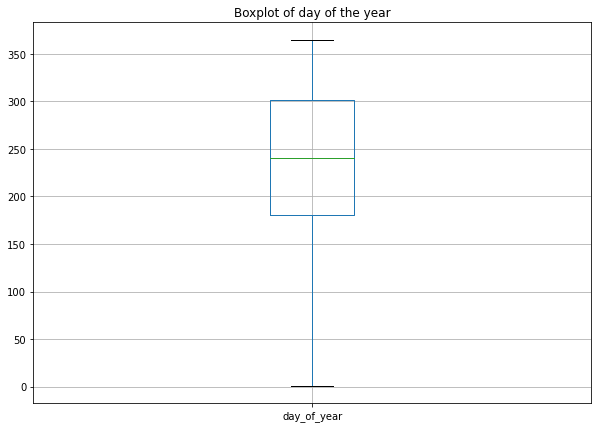

In [27]:
# plot day of the year
df.boxplot('day_of_year', figsize=(10,7))
plt.title('Boxplot of day of the year')
plt.savefig('../Documentation/Figure/fig_10.png',  bbox_inches='tight')
plt.show()

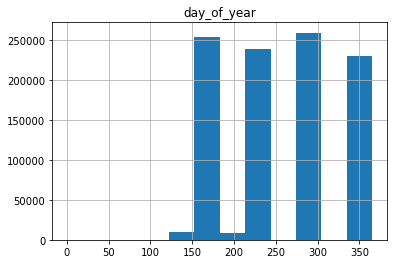

In [28]:
# Analyze schedule date data

df.hist('day_of_year', bins=12)
plt.savefig('../Documentation/Figure/fig_11.png',  bbox_inches='tight')
plt.show()

In [29]:
# get month number in the dataset
unique_month = df.month_number.unique()
print(f'Total Unique Month: {unique_month}')

Total Unique Month: [ 6 12 10  8 11  1  7]


In [30]:
# Month and their frequrncy
for month in unique_month:
    counts = len(df['schedule_arr_time'][df['month_number'] == month])
    print(f'The volumns of month {month} is: {counts}')

The volumns of month 6 is: 263491
The volumns of month 12 is: 229950
The volumns of month 10 is: 259155
The volumns of month 8 is: 247393
The volumns of month 11 is: 9
The volumns of month 1 is: 1
The volumns of month 7 is: 1


#### Most Important features: 
line_name<br>
org_name<br>
dest_name<br>
vech_name<br>
day_of_year<br>
month_number<br>
day_of_month<br>
time_of_day<br>
weekend_status<br>
delays<br>

In [31]:
modify_df = df[['line_name', 'org_name', 'dest_name', 'vech_name', 'weekend_status', 'day_of_year', 
                'month_number', 'day_of_month', 'time_of_day', 'delays']]
modify_df.head()

,line_name,org_name,dest_name,vech_name,weekend_status,day_of_year,month_number,day_of_month,time_of_day,delays
0,B46-SBS,UTICA AV/AV N,SELECT BUS De KALB AV via UTICA,NYCT_7330,False,156,6,5,439,1.85
1,M101,LEXINGTON AV/E 100 ST,LTD EAST VILLAGE 6 ST via LEX AV,NYCT_6057,False,342,12,8,721,10.03
2,Bx31,TREMONT AV/LANE AV,WOODLAWN KATONAH AV,NYCT_7703,False,298,10,25,341,0.10
3,Q20A,COLLEGE PT BL/15 AV,JAMAICA MERRICK BL via 20 AV via MAIN S,NYCT_7391,False,278,10,5,825,0.15
4,Bx34,VALENTINE AV/E FORDHAM RD,WOODLAWN KATONAH AV,NYCT_4102,False,347,12,13,439,0.23


In [32]:
# save new dataset
modify_df.to_csv('../data/nyc_data/final_dataset.csv', index=False, compression='gzip')